In [209]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [211]:
Consumer_Key = "cx83ZljBHab3bnBjVnG1FBDzf"
Consumer_Secret_Key = "ryDeUWIa3CQGoszANUOVT2l7k8POr2GzkppRoWpeNY7umZfh3s"
Access_Token = "857240278268116993-8UfQlpN2xuES6BPUAJ5wFeibKAYdtie"
Access_Token_Secret = "g9hLnhv2VK7vdYgVQBnaACKIf5WRjTg0UjcymNxrmziy8"


In [212]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret_Key)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth)

**lazadaID**

In [213]:
post = api.user_timeline(screen_name="lazadaID", count = 1000, lang="id", tweet_mode="extended")

# print the last 5 tweets
print("Show 5 recent tweets:\n")
i=1
for tweets in post[:5]:
  print((str(i)+'')+ tweets.full_text + '\n')
  i= i+1

Show 5 recent tweets:

1Hempaskan noda hitam, bekas jerawat, dan stretch mark dengan rangkaian produk andalan dari Bio Oil! Di Lazada, ada Diskon s.d. 47%+ Free Masker setiap Pembelian Min, 150 Ribu loh~ Cus beli sekarang: https://t.co/SM0PsM33rh

#TambahKeHidupmu #LazadaID https://t.co/LKP3hnE9Oa

2@foretdelion Hai Lazadian, Danish infokan untuk masa berlakunya bisa cek syarat dan ketentuannya ya Kak.

3Kalau resolusi 2023 kamu adalah makin glowing, ini jawabannya! Cus beli rangkaian produk Adera di Lazada, ada Diskon s.d. 50% +Cashback 20% loh! Mantul kan? Beli di sini: https://t.co/I0dAiNrZRo

#TambahKeHidupmu #LazadaID https://t.co/LUjgwuu7HM

4Makeup kamu mau habis? Tenang, langsung aja belanja di Lazada pakai kartu debit BNI! Kamu bisa dapetin Diskon s.d. 72 Ribu kalau pakai kode promo BNIDBCNY12 loh. Buruan, beli di sini: https://t.co/E4qdClhj1H

#TambahKeHidupmu #LazadaID https://t.co/00fwHPvzz9

5Lazadians, pengen belanja lebih hemat? Langsung aja gabungin Voucher s.d. 100 Rib

In [214]:
df = pd.DataFrame([tweets.full_text for tweets in post], columns=['tweets'])
# Show the first 5 rows of data
df.head()

,tweets
0,"Hempaskan noda hitam, bekas jerawat, dan stret..."
1,"@foretdelion Hai Lazadian, Danish infokan untu..."
2,"Kalau resolusi 2023 kamu adalah makin glowing,..."
3,"Makeup kamu mau habis? Tenang, langsung aja be..."
4,"Lazadians, pengen belanja lebih hemat? Langsun..."


In [215]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+','', text)
  text = re.sub('#','', text)  
  text = re.sub('RT[\s]+', '', text)  
  text = re.sub('https?:\/\/\s+', '', text)  
  text = re.sub('_','',text)
  text = re.sub('yang','',text)
  text = re.sub('terimakasih','',text)
  text = re.sub('ya!','',text)
  text = re.sub('[^0-9A-Za-z \t]','',text)
  text = re.sub('(\w+\/\/\S+)','',text)
  text = re.sub('@ndagels','',text)


  return text

  # Clean the tweets
df['Tweets'] = df['tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,tweets,Tweets
0,"Hempaskan noda hitam, bekas jerawat, dan stret...",Hempaskan noda hitam bekas jerawat dan stretch...
1,"@foretdelion Hai Lazadian, Danish infokan untu...",Hai Lazadian Danish infokan untuk masa berlak...
2,"Kalau resolusi 2023 kamu adalah makin glowing,...",Kalau resolusi 2023 kamu adalah makin glowing ...
3,"Makeup kamu mau habis? Tenang, langsung aja be...",Makeup kamu mau habis Tenang langsung aja bela...
4,"Lazadians, pengen belanja lebih hemat? Langsun...",Lazadians pengen belanja lebih hemat Langsung ...
...,...,...
195,@Ariandi_Lukman Hai Kak DMnya sudah kami respo...,Lukman Hai Kak DMnya sudah kami respon ya sila...
196,"@lovekfcmore Hai Lazadian, Natan turut menyesa...",Hai Lazadian Natan turut menyesal buat produk...
197,"@Anton10780299 Hai Kak Anton, Natan turut meny...",Hai Kak Anton Natan turut menyesal nih kode S...
198,Laki punya gaya? Pastinya dong! Style diri kam...,Laki punya gaya Pastinya dong Style diri kamu ...


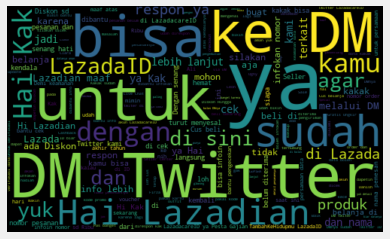

In [216]:
#worl cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [217]:
from typing import Text
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

# Create two new colums 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity) 
df['Polarity'] = df['Tweets'].apply(getPolarity)  

# Show the new dataframe with colums 'Subjectivity' & 'Polarity'
df

,tweets,Tweets,Subjectivity,Polarity
0,"Hempaskan noda hitam, bekas jerawat, dan stret...",Hempaskan noda hitam bekas jerawat dan stretch...,0.8,0.4
1,"@foretdelion Hai Lazadian, Danish infokan untu...",Hai Lazadian Danish infokan untuk masa berlak...,0.0,0.0
2,"Kalau resolusi 2023 kamu adalah makin glowing,...",Kalau resolusi 2023 kamu adalah makin glowing ...,0.0,0.0
3,"Makeup kamu mau habis? Tenang, langsung aja be...",Makeup kamu mau habis Tenang langsung aja bela...,0.0,0.0
4,"Lazadians, pengen belanja lebih hemat? Langsun...",Lazadians pengen belanja lebih hemat Langsung ...,0.0,0.0
...,...,...,...,...
195,@Ariandi_Lukman Hai Kak DMnya sudah kami respo...,Lukman Hai Kak DMnya sudah kami respon ya sila...,0.0,0.0
196,"@lovekfcmore Hai Lazadian, Natan turut menyesa...",Hai Lazadian Natan turut menyesal buat produk...,0.0,0.0
197,"@Anton10780299 Hai Kak Anton, Natan turut meny...",Hai Kak Anton Natan turut menyesal nih kode S...,0.0,0.0
198,Laki punya gaya? Pastinya dong! Style diri kam...,Laki punya gaya Pastinya dong Style diri kamu ...,0.0,0.0


In [218]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) 
for i in range(0, sortedDF.shape[0]):
  print(str(j) + ') '+sortedDF['Tweets'][i])
  print()
  j=j+1

Printing negative tweets:

1) Hempaskan noda hitam bekas jerawat dan stretch mark dengan rangkaian produk andalan dari Bio Oil Di Lazada ada Diskon sd 47 Free Masker setiap Pembelian Min 150 Ribu loh Cus beli sekarang httpstcoSM0PsM33rhTambahKeHidupmu LazadaID httpstcoLKP3hnE9Oa

2)  Hai Lazadian Danish infokan untuk masa berlakunya bisa cek syarat dan ketentuannya ya Kak

3) Kalau resolusi 2023 kamu adalah makin glowing ini jawabann Cus beli rangkaian produk Adera di Lazada ada Diskon sd 50 Cashback 20 loh Mantul kan Beli di sini httpstcoI0dAiNrZRoTambahKeHidupmu LazadaID httpstcoLUjgwuu7HM

4) Makeup kamu mau habis Tenang langsung aja belanja di Lazada pakai kartu debit BNI Kamu bisa dapetin Diskon sd 72 Ribu kalau pakai kode promo BNIDBCNY12 loh Buruan beli di sini httpstcoE4qdClhj1HTambahKeHidupmu LazadaID httpstco00fwHPvzz9

5) Lazadians pengen belanja lebih hemat Langsung aja gabungin Voucher sd 100 Ribu  Cashback 100 di LazFlash Pesta Gajian tanggal 25  31 Desember Cus beli di s

In [219]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) 
for i in range(0, sortedDF.shape[0]):
  print(str(j) + ') '+sortedDF['Tweets'][i])
  print()
  j=j+1

Printing Positive tweets:

1) Hempaskan noda hitam bekas jerawat dan stretch mark dengan rangkaian produk andalan dari Bio Oil Di Lazada ada Diskon sd 47 Free Masker setiap Pembelian Min 150 Ribu loh Cus beli sekarang httpstcoSM0PsM33rhTambahKeHidupmu LazadaID httpstcoLKP3hnE9Oa

2)  Hai Lazadian Danish infokan untuk masa berlakunya bisa cek syarat dan ketentuannya ya Kak

3) Kalau resolusi 2023 kamu adalah makin glowing ini jawabann Cus beli rangkaian produk Adera di Lazada ada Diskon sd 50 Cashback 20 loh Mantul kan Beli di sini httpstcoI0dAiNrZRoTambahKeHidupmu LazadaID httpstcoLUjgwuu7HM

4) Makeup kamu mau habis Tenang langsung aja belanja di Lazada pakai kartu debit BNI Kamu bisa dapetin Diskon sd 72 Ribu kalau pakai kode promo BNIDBCNY12 loh Buruan beli di sini httpstcoE4qdClhj1HTambahKeHidupmu LazadaID httpstco00fwHPvzz9

5) Lazadians pengen belanja lebih hemat Langsung aja gabungin Voucher sd 100 Ribu  Cashback 100 di LazFlash Pesta Gajian tanggal 25  31 Desember Cus beli di s

In [220]:
from typing import Text
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

# Create two new colums 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity) 
df['Polarity'] = df['Tweets'].apply(getPolarity)  

# Show the new dataframe with colums 'Subjectivity' & 'Polarity'
df

,tweets,Tweets,Subjectivity,Polarity
0,"Hempaskan noda hitam, bekas jerawat, dan stret...",Hempaskan noda hitam bekas jerawat dan stretch...,0.8,0.4
1,"@foretdelion Hai Lazadian, Danish infokan untu...",Hai Lazadian Danish infokan untuk masa berlak...,0.0,0.0
2,"Kalau resolusi 2023 kamu adalah makin glowing,...",Kalau resolusi 2023 kamu adalah makin glowing ...,0.0,0.0
3,"Makeup kamu mau habis? Tenang, langsung aja be...",Makeup kamu mau habis Tenang langsung aja bela...,0.0,0.0
4,"Lazadians, pengen belanja lebih hemat? Langsun...",Lazadians pengen belanja lebih hemat Langsung ...,0.0,0.0
...,...,...,...,...
195,@Ariandi_Lukman Hai Kak DMnya sudah kami respo...,Lukman Hai Kak DMnya sudah kami respon ya sila...,0.0,0.0
196,"@lovekfcmore Hai Lazadian, Natan turut menyesa...",Hai Lazadian Natan turut menyesal buat produk...,0.0,0.0
197,"@Anton10780299 Hai Kak Anton, Natan turut meny...",Hai Kak Anton Natan turut menyesal nih kode S...,0.0,0.0
198,Laki punya gaya? Pastinya dong! Style diri kam...,Laki punya gaya Pastinya dong Style diri kamu ...,0.0,0.0


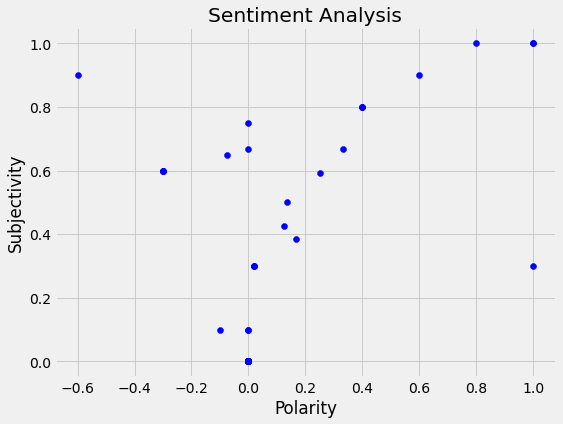

In [221]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
  # plt.scatter(x,y,color)
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show

In [222]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
      return 'Neutral'
  else:
    return 'Positive'
df['analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df


,tweets,Tweets,Subjectivity,Polarity,analysis
0,"Hempaskan noda hitam, bekas jerawat, dan stret...",Hempaskan noda hitam bekas jerawat dan stretch...,0.8,0.4,Positive
1,"@foretdelion Hai Lazadian, Danish infokan untu...",Hai Lazadian Danish infokan untuk masa berlak...,0.0,0.0,Neutral
2,"Kalau resolusi 2023 kamu adalah makin glowing,...",Kalau resolusi 2023 kamu adalah makin glowing ...,0.0,0.0,Neutral
3,"Makeup kamu mau habis? Tenang, langsung aja be...",Makeup kamu mau habis Tenang langsung aja bela...,0.0,0.0,Neutral
4,"Lazadians, pengen belanja lebih hemat? Langsun...",Lazadians pengen belanja lebih hemat Langsung ...,0.0,0.0,Neutral
...,...,...,...,...,...
195,@Ariandi_Lukman Hai Kak DMnya sudah kami respo...,Lukman Hai Kak DMnya sudah kami respon ya sila...,0.0,0.0,Neutral
196,"@lovekfcmore Hai Lazadian, Natan turut menyesa...",Hai Lazadian Natan turut menyesal buat produk...,0.0,0.0,Neutral
197,"@Anton10780299 Hai Kak Anton, Natan turut meny...",Hai Kak Anton Natan turut menyesal nih kode S...,0.0,0.0,Neutral
198,Laki punya gaya? Pastinya dong! Style diri kam...,Laki punya gaya Pastinya dong Style diri kamu ...,0.0,0.0,Neutral


In [223]:
ptweets = df[df.analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

8.0

In [224]:
ntweets = df[df.analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

3.5

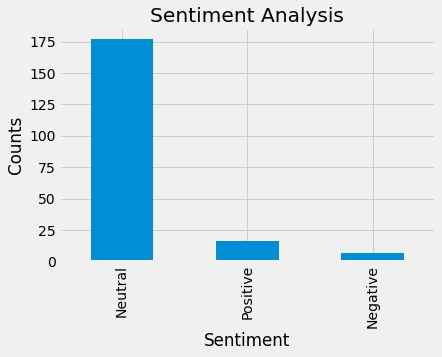

In [225]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()

**JDid** 

In [226]:
post = api.user_timeline(screen_name="JDid", count = 1000, lang="id", tweet_mode="extended")

# print the last 5 tweets
print("Show 5 recent tweets:\n")
i=1
for tweets in post[:5]:
  print((str(i)+'')+ tweets.full_text + '\n')
  i= i+1

Show 5 recent tweets:

1Hi Sahabat JD ❤️

Spesial hari Natal, Minjoy punya promo HOLY MAGICAL DEALS untuk outfit, tas, aksesoris incaran kamu dan dapatkan DISKON s/d 87% + start from 21 RB 😍

Belanja disini https://t.co/C14vgy7660

#JDID #DijaminORI #DijaminSampai https://t.co/SuzPu6czsb

2@IkaPrat04453888 Hi kak @IkaPrat04453888 mohon maaf sekali kak, Minjoy sarankan untuk menunggu terlebih dahulu ya kak respon dari tim kami. Thanks :) *DW

3@IkaPrat04453888 Hi kak @IkaPrat04453888 jika ada kendala atau pertanyaan seputar https://t.co/zwrZJkI3Rk bisa melalui DM ya kak. Minjoy tunggu kak :) *DW

4Yuhuuu Sahabat JD 😀
MULTI BRAND DAY hari ini spesial dari Rinnai &amp; Miyako ❤️
Mulai dari blender, rice cooker, dan kompor lagi ada DISKON s/d 40% 🔥

Check out disini  https://t.co/OnS82el4To

#JDID #DijaminORI #DijaminSampai https://t.co/coOFlLMtEv

5Tanggal tua masih bisa check out dong di https://t.co/zwrZJkIBGS 😆
Mulai dari kebutuhan dapur dan anak, sampai skin care lagi ada DISKON s/d 8

In [227]:
df = pd.DataFrame([tweets.full_text for tweets in post], columns=['tweets'])
# Show the first 5 rows of data
df.head()

,tweets
0,"Hi Sahabat JD ❤️\n\nSpesial hari Natal, Minjoy..."
1,@IkaPrat04453888 Hi kak @IkaPrat04453888 mohon...
2,@IkaPrat04453888 Hi kak @IkaPrat04453888 jika ...
3,Yuhuuu Sahabat JD 😀\nMULTI BRAND DAY hari ini ...
4,Tanggal tua masih bisa check out dong di https...


In [228]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+','', text)
  text = re.sub('#','', text)  
  text = re.sub('RT[\s]+', '', text)  
  text = re.sub('https?:\/\/\s+', '', text)  
  text = re.sub('_','',text)
  text = re.sub('yang','',text)
  text = re.sub('terimakasih','',text)
  text = re.sub('ya!','',text)
  text = re.sub('[^0-9A-Za-z \t]','',text)
  text = re.sub('(\w+\/\/\S+)','',text)
  text = re.sub('@ndagels','',text)


  return text

  # Clean the tweets
df['Tweets'] = df['tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,tweets,Tweets
0,"Hi Sahabat JD ❤️\n\nSpesial hari Natal, Minjoy...",Hi Sahabat JD Spesial hari Natal Minjoy punya ...
1,@IkaPrat04453888 Hi kak @IkaPrat04453888 mohon...,Hi kak mohon maaf sekali kak Minjoy sarankan...
2,@IkaPrat04453888 Hi kak @IkaPrat04453888 jika ...,Hi kak jika ada kendala atau pertanyaan sepu...
3,Yuhuuu Sahabat JD 😀\nMULTI BRAND DAY hari ini ...,Yuhuuu Sahabat JD MULTI BRAND DAY hari ini spe...
4,Tanggal tua masih bisa check out dong di https...,Tanggal tua masih bisa check out dong di https...
...,...,...
195,"Yang bisa tebak katanya, Minjoy doain tanggal ...",Yang bisa tebak katanya Minjoy doain tanggal t...
196,"Sahabat JD, Minjoy mau info nih kalau hari ini...",Sahabat JD Minjoy mau info nih kalau hari ini ...
197,"Sahabat JD, udah kepoin promo CAMERA GREAT DEA...",Sahabat JD udah kepoin promo CAMERA GREAT DEAL...
198,"Tes kejelian mata 👀👀\nSahabat JD, ada yang bis...",Tes kejelian mata Sahabat JD ada bisa tebak k...


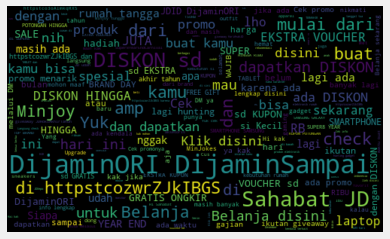

In [229]:
#worl cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [230]:
from typing import Text
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

# Create two new colums 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity) 
df['Polarity'] = df['Tweets'].apply(getPolarity)  

# Show the new dataframe with colums 'Subjectivity' & 'Polarity'
df

,tweets,Tweets,Subjectivity,Polarity
0,"Hi Sahabat JD ❤️\n\nSpesial hari Natal, Minjoy...",Hi Sahabat JD Spesial hari Natal Minjoy punya ...,1.000000,0.500000
1,@IkaPrat04453888 Hi kak @IkaPrat04453888 mohon...,Hi kak mohon maaf sekali kak Minjoy sarankan...,0.200000,0.200000
2,@IkaPrat04453888 Hi kak @IkaPrat04453888 jika ...,Hi kak jika ada kendala atau pertanyaan sepu...,0.000000,0.000000
3,Yuhuuu Sahabat JD 😀\nMULTI BRAND DAY hari ini ...,Yuhuuu Sahabat JD MULTI BRAND DAY hari ini spe...,0.000000,0.000000
4,Tanggal tua masih bisa check out dong di https...,Tanggal tua masih bisa check out dong di https...,0.000000,0.000000
...,...,...,...,...
195,"Yang bisa tebak katanya, Minjoy doain tanggal ...",Yang bisa tebak katanya Minjoy doain tanggal t...,1.000000,0.800000
196,"Sahabat JD, Minjoy mau info nih kalau hari ini...",Sahabat JD Minjoy mau info nih kalau hari ini ...,0.454545,0.136364
197,"Sahabat JD, udah kepoin promo CAMERA GREAT DEA...",Sahabat JD udah kepoin promo CAMERA GREAT DEAL...,0.425000,0.450000
198,"Tes kejelian mata 👀👀\nSahabat JD, ada yang bis...",Tes kejelian mata Sahabat JD ada bisa tebak k...,0.000000,0.000000


In [231]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) 
for i in range(0, sortedDF.shape[0]):
  print(str(j) + ') '+sortedDF['Tweets'][i])
  print()
  j=j+1

Printing negative tweets:

1) Hi Sahabat JD Spesial hari Natal Minjoy punya promo HOLY MAGICAL DEALS untuk outfit tas aksesoris incaran kamu dan dapatkan DISKON sd 87  start from 21 RB Belanja disini httpstcoC14vgy7660JDID DijaminORI DijaminSampai httpstcoSuzPu6czsb

2)  Hi kak  mohon maaf sekali kak Minjoy sarankan untuk menunggu terlebih dahulu ya kak respon dari tim kami Thanks  DW

3)  Hi kak  jika ada kendala atau pertanyaan seputar httpstcozwrZJkI3Rk bisa melalui DM ya kak Minjoy tunggu kak  DW

4) Yuhuuu Sahabat JD MULTI BRAND DAY hari ini spesial dari Rinnai amp Miyako Mulai dari blender rice cooker dan kompor lagi ada DISKON sd 40 Check out disini  httpstcoOnS82el4ToJDID DijaminORI DijaminSampai httpstcocoOFlLMtEv

5) Tanggal tua masih bisa check out dong di httpstcozwrZJkIBGS Mulai dari kebutuhan dapur dan anak sampai skin care lagi ada DISKON sd 80 lho Buruan check out disini httpstcoIwIOsOze7wJDID DijaminORI DijaminSampai httpstcolrKDRvVapc

6) Sahabat JD waktu  tepat nih b

In [232]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) 
for i in range(0, sortedDF.shape[0]):
  print(str(j) + ') '+sortedDF['Tweets'][i])
  print()
  j=j+1

Printing Positive tweets:

1) Hi Sahabat JD Spesial hari Natal Minjoy punya promo HOLY MAGICAL DEALS untuk outfit tas aksesoris incaran kamu dan dapatkan DISKON sd 87  start from 21 RB Belanja disini httpstcoC14vgy7660JDID DijaminORI DijaminSampai httpstcoSuzPu6czsb

2)  Hi kak  mohon maaf sekali kak Minjoy sarankan untuk menunggu terlebih dahulu ya kak respon dari tim kami Thanks  DW

3)  Hi kak  jika ada kendala atau pertanyaan seputar httpstcozwrZJkI3Rk bisa melalui DM ya kak Minjoy tunggu kak  DW

4) Yuhuuu Sahabat JD MULTI BRAND DAY hari ini spesial dari Rinnai amp Miyako Mulai dari blender rice cooker dan kompor lagi ada DISKON sd 40 Check out disini  httpstcoOnS82el4ToJDID DijaminORI DijaminSampai httpstcocoOFlLMtEv

5) Tanggal tua masih bisa check out dong di httpstcozwrZJkIBGS Mulai dari kebutuhan dapur dan anak sampai skin care lagi ada DISKON sd 80 lho Buruan check out disini httpstcoIwIOsOze7wJDID DijaminORI DijaminSampai httpstcolrKDRvVapc

6) Sahabat JD waktu  tepat nih b

In [233]:
from typing import Text
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

# Create two new colums 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity) 
df['Polarity'] = df['Tweets'].apply(getPolarity)  

# Show the new dataframe with colums 'Subjectivity' & 'Polarity'
df

,tweets,Tweets,Subjectivity,Polarity
0,"Hi Sahabat JD ❤️\n\nSpesial hari Natal, Minjoy...",Hi Sahabat JD Spesial hari Natal Minjoy punya ...,1.000000,0.500000
1,@IkaPrat04453888 Hi kak @IkaPrat04453888 mohon...,Hi kak mohon maaf sekali kak Minjoy sarankan...,0.200000,0.200000
2,@IkaPrat04453888 Hi kak @IkaPrat04453888 jika ...,Hi kak jika ada kendala atau pertanyaan sepu...,0.000000,0.000000
3,Yuhuuu Sahabat JD 😀\nMULTI BRAND DAY hari ini ...,Yuhuuu Sahabat JD MULTI BRAND DAY hari ini spe...,0.000000,0.000000
4,Tanggal tua masih bisa check out dong di https...,Tanggal tua masih bisa check out dong di https...,0.000000,0.000000
...,...,...,...,...
195,"Yang bisa tebak katanya, Minjoy doain tanggal ...",Yang bisa tebak katanya Minjoy doain tanggal t...,1.000000,0.800000
196,"Sahabat JD, Minjoy mau info nih kalau hari ini...",Sahabat JD Minjoy mau info nih kalau hari ini ...,0.454545,0.136364
197,"Sahabat JD, udah kepoin promo CAMERA GREAT DEA...",Sahabat JD udah kepoin promo CAMERA GREAT DEAL...,0.425000,0.450000
198,"Tes kejelian mata 👀👀\nSahabat JD, ada yang bis...",Tes kejelian mata Sahabat JD ada bisa tebak k...,0.000000,0.000000


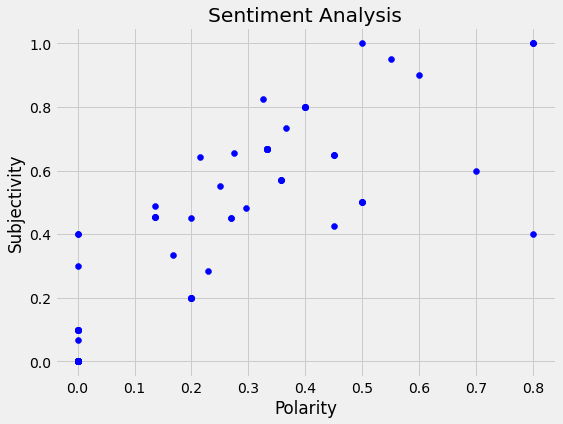

In [234]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
  # plt.scatter(x,y,color)
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show

In [235]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
      return 'Neutral'
  else:
    return 'Positive'
df['analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,tweets,Tweets,Subjectivity,Polarity,analysis
0,"Hi Sahabat JD ❤️\n\nSpesial hari Natal, Minjoy...",Hi Sahabat JD Spesial hari Natal Minjoy punya ...,1.000000,0.500000,Positive
1,@IkaPrat04453888 Hi kak @IkaPrat04453888 mohon...,Hi kak mohon maaf sekali kak Minjoy sarankan...,0.200000,0.200000,Positive
2,@IkaPrat04453888 Hi kak @IkaPrat04453888 jika ...,Hi kak jika ada kendala atau pertanyaan sepu...,0.000000,0.000000,Neutral
3,Yuhuuu Sahabat JD 😀\nMULTI BRAND DAY hari ini ...,Yuhuuu Sahabat JD MULTI BRAND DAY hari ini spe...,0.000000,0.000000,Neutral
4,Tanggal tua masih bisa check out dong di https...,Tanggal tua masih bisa check out dong di https...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,"Yang bisa tebak katanya, Minjoy doain tanggal ...",Yang bisa tebak katanya Minjoy doain tanggal t...,1.000000,0.800000,Positive
196,"Sahabat JD, Minjoy mau info nih kalau hari ini...",Sahabat JD Minjoy mau info nih kalau hari ini ...,0.454545,0.136364,Positive
197,"Sahabat JD, udah kepoin promo CAMERA GREAT DEA...",Sahabat JD udah kepoin promo CAMERA GREAT DEAL...,0.425000,0.450000,Positive
198,"Tes kejelian mata 👀👀\nSahabat JD, ada yang bis...",Tes kejelian mata Sahabat JD ada bisa tebak k...,0.000000,0.000000,Neutral


In [236]:
ptweets = df[df.analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

29.0

In [237]:
ntweets = df[df.analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

0.0

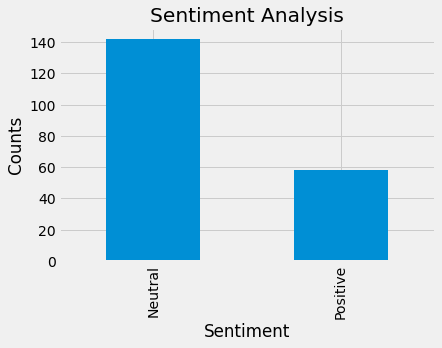

In [238]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()

Dari data twitter pengguna e-commerce lazadaID dan jdID diperoleh nilai sebagai berikut:
1. LazadaID diperoleh nilai positif 8 dan negatif 3.5
2. jdID diperoleh nilai positif 29 dan negatif 0

dapat disimpulkan bahwa fasilitas atau layanan dari jdID dengan nilai positif 29 lebih banyak mendapatkan respon positif dari konsumen, bahkan nilai negatif dari konsumen adalah 0.

sehingga dari perbandingan nilai positif dan negatif konsumen pengguna lazada dan jdID, maka lazadaID perlu untuk meningkatkan layananya sehingga konsumen merasa nyaman dan mendapatkan banyak keuntungan selama memanfaatkan layanan e-commercenya.